# Importing libraries

In [1]:
#import all the necessary libraries to read the data and build neural network
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#library for plotting the training graph 
from matplotlib import pyplot as plt

# Reading Data

In [2]:
#read the data
planet_info = pd.read_csv('planetdata.csv') 

In [3]:
planet_info.head(2)

,hostnames,fpl_letter,fst_mass,fst_masserr1,fst_masserr2,fst_age,fst_ageerr1,fst_ageerr2,fst_met,fst_meterr1,fst_meterr2,fst_dist,fst_disterr1,fst_disterr2,Nss,Pnull,BIC1,rhoN,Phigh,HJflag,insamp,fpl_bmasse,fpl_bmasseerr1,fpl_bmasseerr2,fpl_smax,fpl_smaxerr1,fpl_smaxerr2,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,fpl_eccen,fpl_eccenerr1,fpl_eccenerr2,fpl_rade,fpl_radeerr1,fpl_radeerr2,fpl_dens,fpl_denserr1,fpl_denserr2
0,11 Com,b,2.7,0.3,-0.3,-,-,-,-0.35,0.09,-0.09,93.37,1.92,-1.92,600,0.000342,41.136713,0.044479,0.000013,N,N,6165.6,476.7,-476.7,1.29,0.05,-0.05,326.03,0.32,-0.32,0.231,0.005,-0.005,12.1,-,-,19.1,-,-
1,11 UMi,b,2.78,0.69,-0.69,1.56,0.54,-0.54,-0.02,-,-,125.72,1.97,-1.97,600,0.000002,103.007276,3.278100,0.932356,N,N,4684.8142,794.575,-794.575,1.53,0.07,-0.07,516.21997,3.2,-3.2,0.08,0.03,-0.03,12.3,-,-,13.8,-,-


In [4]:
planet_info.shape

(1522, 39)

In [5]:
# list the last two rows of the data frame to have glimpse of the *data*
planet_info.tail(2)

,hostnames,fpl_letter,fst_mass,fst_masserr1,fst_masserr2,fst_age,fst_ageerr1,fst_ageerr2,fst_met,fst_meterr1,fst_meterr2,fst_dist,fst_disterr1,fst_disterr2,Nss,Pnull,BIC1,rhoN,Phigh,HJflag,insamp,fpl_bmasse,fpl_bmasseerr1,fpl_bmasseerr2,fpl_smax,fpl_smaxerr1,fpl_smaxerr2,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,fpl_eccen,fpl_eccenerr1,fpl_eccenerr2,fpl_rade,fpl_radeerr1,fpl_radeerr2,fpl_dens,fpl_denserr1,fpl_denserr2
1520,ups And,d,1.3,-,-,5.0,-,-,0.04,0.03,-0.03,13.41,0.06,-0.06,600,0.000038,44.025699,1.020776,0.824312,Y,N,1313.22,9.21668,-9.21668,2.51329,0.00075,-0.00075,1276.46,0.57,-0.57,0.2987,0.0072,-0.0072,13.0,-,-,3.28,-,-
1521,xi Aql,b,2.2,-,-,7.1,3.6,-3.6,-0.205,0.039,-0.039,56.27,0.56,-0.56,600,0.000006,109.624710,0.817285,0.261341,N,N,890.0,-,-,0.68,-,-,136.75,0.25,-0.25,0.0,-,-,13.2,-,-,2.13,-,-


# Data Preprocessing

In [6]:
#seems that fpl_letter won't have any significance to the p value
planet_info = planet_info.drop(['fpl_letter','hostnames','fpl_denserr1','fpl_denserr2'], axis = 1)

In [7]:
#convert colums containing Y and N into numeric 1 and 0 to make it
#suitable for feeding into the neural network
def binary_text_to_integer_class(value):
  if value == "Y":
    return 1
  else:
    return 0


In [8]:
#change HJflag and insamp into numeric using above function
planet_info['HJflag'] = planet_info['HJflag'].apply(binary_text_to_integer_class)
planet_info['insamp'] = planet_info['insamp'].apply(binary_text_to_integer_class)

In [9]:
planet_info.head(2)

,fst_mass,fst_masserr1,fst_masserr2,fst_age,fst_ageerr1,fst_ageerr2,fst_met,fst_meterr1,fst_meterr2,fst_dist,fst_disterr1,fst_disterr2,Nss,Pnull,BIC1,rhoN,Phigh,HJflag,insamp,fpl_bmasse,fpl_bmasseerr1,fpl_bmasseerr2,fpl_smax,fpl_smaxerr1,fpl_smaxerr2,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,fpl_eccen,fpl_eccenerr1,fpl_eccenerr2,fpl_rade,fpl_radeerr1,fpl_radeerr2,fpl_dens
0,2.7,0.3,-0.3,-,-,-,-0.35,0.09,-0.09,93.37,1.92,-1.92,600,0.000342,41.136713,0.044479,0.000013,0,0,6165.6,476.7,-476.7,1.29,0.05,-0.05,326.03,0.32,-0.32,0.231,0.005,-0.005,12.1,-,-,19.1
1,2.78,0.69,-0.69,1.56,0.54,-0.54,-0.02,-,-,125.72,1.97,-1.97,600,0.000002,103.007276,3.278100,0.932356,0,0,4684.8142,794.575,-794.575,1.53,0.07,-0.07,516.21997,3.2,-3.2,0.08,0.03,-0.03,12.3,-,-,13.8


# Handling missing values

In [10]:
for col in planet_info.columns:
    print("Column name {} : \t Number of missing values -> {} \t".format(col,len(planet_info[planet_info[col] == "-"])))

Column name fst_mass : 	 Number of missing values -> 2 	
Column name fst_masserr1 : 	 Number of missing values -> 180 	
Column name fst_masserr2 : 	 Number of missing values -> 192 	
Column name fst_age : 	 Number of missing values -> 349 	
Column name fst_ageerr1 : 	 Number of missing values -> 477 	
Column name fst_ageerr2 : 	 Number of missing values -> 477 	
Column name fst_met : 	 Number of missing values -> 64 	
Column name fst_meterr1 : 	 Number of missing values -> 424 	
Column name fst_meterr2 : 	 Number of missing values -> 424 	
Column name fst_dist : 	 Number of missing values -> 0 	
Column name fst_disterr1 : 	 Number of missing values -> 36 	
Column name fst_disterr2 : 	 Number of missing values -> 36 	
Column name Nss : 	 Number of missing values -> 0 	
Column name Pnull : 	 Number of missing values -> 0 	
Column name BIC1 : 	 Number of missing values -> 0 	
Column name rhoN : 	 Number of missing values -> 0 	
Column name Phigh : 	 Number of missing values -> 0 	
Column 

In [11]:
planet_info = planet_info.replace(to_replace ="-",
                            value =0.0)


In [12]:
planet_info = planet_info.apply(pd.to_numeric)

## Replacing missing values with mean value of the columns

In [13]:
planet_info = planet_info.replace(to_replace ="-",
                            value =np.nan)

for column in planet_info.columns:
    planet_info[column].fillna(value=planet_info[column].mean(), inplace=True)

,fst_mass,fst_masserr1,fst_masserr2,fst_age,fst_ageerr1,fst_ageerr2,fst_met,fst_meterr1,fst_meterr2,fst_dist,fst_disterr1,fst_disterr2,Nss,Pnull,BIC1,rhoN,Phigh,HJflag,insamp,fpl_bmasse,fpl_bmasseerr1,fpl_bmasseerr2,fpl_smax,fpl_smaxerr1,fpl_smaxerr2,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,fpl_eccen,fpl_eccenerr1,fpl_eccenerr2,fpl_rade,fpl_radeerr1,fpl_radeerr2,fpl_dens
0,2.70,0.30,-0.30,0.00,0.00,0.00,-0.350,0.090,-0.090,93.37,1.92,-1.92,600,3.418255e-04,41.136713,0.044479,1.336553e-05,0,0,6165.6000,476.70000,-476.70000,1.290000,0.050000,-0.050000,326.030000,0.320000,-0.320000,0.2310,0.0050,-0.0050,12.1,0.0,0.0,19.100
1,2.78,0.69,-0.69,1.56,0.54,-0.54,-0.020,0.000,0.000,125.72,1.97,-1.97,600,2.451958e-06,103.007276,3.278100,9.323556e-01,0,0,4684.8142,794.57500,-794.57500,1.530000,0.070000,-0.070000,516.219970,3.200000,-3.200000,0.0800,0.0300,-0.0300,12.3,0.0,0.0,13.800
2,2.20,0.10,-0.20,4.50,1.90,-1.90,-0.240,0.030,-0.030,75.59,0.71,-0.71,600,7.074101e-07,136.579750,0.015625,1.085475e-24,0,0,1525.5000,0.00000,0.00000,0.830000,0.000000,0.000000,185.840000,0.230000,-0.230000,0.0000,0.0000,0.0000,12.9,0.0,0.0,3.900
3,0.90,0.04,-0.04,5.24,0.00,0.00,0.410,0.000,0.000,17.94,0.01,-0.01,600,1.475992e-05,116.488419,2.620184,8.475107e-01,0,0,1481.0878,47.67450,-47.67450,2.930000,0.080000,-0.080000,1773.400020,2.500000,-2.500000,0.3700,0.0000,0.0000,12.9,0.0,0.0,3.790
4,1.08,0.04,-0.04,7.40,0.10,-0.10,0.060,0.000,0.000,21.15,0.01,-0.01,600,1.015148e-05,89.060115,0.765567,4.877697e-01,0,0,565.7374,25.42640,-25.42640,1.660000,0.030000,-0.030000,798.500000,1.000000,-1.000000,0.6800,0.0200,-0.0200,13.5,0.0,0.0,1.260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,2.30,0.30,-0.30,1.22,0.76,-0.76,0.140,0.100,-0.100,112.64,4.07,-4.07,600,2.228934e-07,128.222146,3.070513,9.349345e-01,0,0,6547.0000,0.00000,0.00000,1.170000,0.000000,0.000000,305.500000,0.100000,-0.100000,0.0310,0.0090,-0.0090,12.1,0.0,0.0,20.300
1518,1.30,0.00,0.00,5.00,0.00,0.00,0.040,0.030,-0.030,13.41,0.06,-0.06,600,1.005174e-04,44.025699,0.917288,7.920107e-01,1,0,218.5310,1.39839,-1.39839,0.059222,0.000000,0.000000,4.617033,0.000023,-0.000023,0.0215,0.0007,-0.0007,14.0,0.0,0.0,0.438
1519,1.30,0.00,0.00,5.00,0.00,0.00,0.040,0.030,-0.030,13.41,0.06,-0.06,600,4.913096e-04,44.025699,0.913580,7.906793e-01,1,0,629.5950,6.03852,-6.03852,0.827774,0.000015,-0.000015,241.258000,0.064000,-0.064000,0.2596,0.0079,-0.0079,13.4,0.0,0.0,1.440
1520,1.30,0.00,0.00,5.00,0.00,0.00,0.040,0.030,-0.030,13.41,0.06,-0.06,600,3.765322e-05,44.025699,1.020776,8.243122e-01,1,0,1313.2200,9.21668,-9.21668,2.513290,0.000750,-0.000750,1276.460000,0.570000,-0.570000,0.2987,0.0072,-0.0072,13.0,0.0,0.0,3.280


# Replacing missing values with mode

In [14]:
planet_info[['fst_ageerr2']].mode()

,fst_ageerr2
0,0.0


In [ ]:
planet_info = planet_info.replace(to_replace ="-",
                            value =np.nan)

In [ ]:

for column in planet_info.columns:
    planet_info[column].fillna(value=planet_info[column].mode()[0], inplace=True)


In [ ]:
planet_info.head()

,fst_mass,fst_masserr1,fst_masserr2,fst_age,fst_ageerr1,fst_ageerr2,fst_met,fst_meterr1,fst_meterr2,fst_dist,fst_disterr1,fst_disterr2,Nss,Pnull,BIC1,rhoN,Phigh,HJflag,insamp,fpl_bmasse,fpl_bmasseerr1,fpl_bmasseerr2,fpl_smax,fpl_smaxerr1,fpl_smaxerr2,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,fpl_eccen,fpl_eccenerr1,fpl_eccenerr2,fpl_rade,fpl_radeerr1,fpl_radeerr2,fpl_dens
0,2.70,0.30,-0.30,0.00,0.00,0.00,-0.35,0.09,-0.09,93.37,1.92,-1.92,600,3.418255e-04,41.136713,0.044479,1.336553e-05,0,0,6165.6000,476.7000,-476.7000,1.29,0.05,-0.05,326.03000,0.32,-0.32,0.231,0.005,-0.005,12.1,0.0,0.0,19.10
1,2.78,0.69,-0.69,1.56,0.54,-0.54,-0.02,0.00,0.00,125.72,1.97,-1.97,600,2.451958e-06,103.007276,3.278100,9.323556e-01,0,0,4684.8142,794.5750,-794.5750,1.53,0.07,-0.07,516.21997,3.20,-3.20,0.080,0.030,-0.030,12.3,0.0,0.0,13.80
2,2.20,0.10,-0.20,4.50,1.90,-1.90,-0.24,0.03,-0.03,75.59,0.71,-0.71,600,7.074101e-07,136.579750,0.015625,1.085475e-24,0,0,1525.5000,0.0000,0.0000,0.83,0.00,0.00,185.84000,0.23,-0.23,0.000,0.000,0.000,12.9,0.0,0.0,3.90
3,0.90,0.04,-0.04,5.24,0.00,0.00,0.41,0.00,0.00,17.94,0.01,-0.01,600,1.475992e-05,116.488419,2.620184,8.475107e-01,0,0,1481.0878,47.6745,-47.6745,2.93,0.08,-0.08,1773.40002,2.50,-2.50,0.370,0.000,0.000,12.9,0.0,0.0,3.79
4,1.08,0.04,-0.04,7.40,0.10,-0.10,0.06,0.00,0.00,21.15,0.01,-0.01,600,1.015148e-05,89.060115,0.765567,4.877697e-01,0,0,565.7374,25.4264,-25.4264,1.66,0.03,-0.03,798.50000,1.00,-1.00,0.680,0.020,-0.020,13.5,0.0,0.0,1.26


In [15]:

planet_info.corr(method='pearson', min_periods=1)

,fst_mass,fst_masserr1,fst_masserr2,fst_age,fst_ageerr1,fst_ageerr2,fst_met,fst_meterr1,fst_meterr2,fst_dist,fst_disterr1,fst_disterr2,Nss,Pnull,BIC1,rhoN,Phigh,HJflag,insamp,fpl_bmasse,fpl_bmasseerr1,fpl_bmasseerr2,fpl_smax,fpl_smaxerr1,fpl_smaxerr2,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,fpl_eccen,fpl_eccenerr1,fpl_eccenerr2,fpl_rade,fpl_radeerr1,fpl_radeerr2,fpl_dens
fst_mass,1.000000,0.720052,-0.722326,-0.042904,-0.085135,0.068283,0.090105,-0.132775,0.129592,0.247510,0.056839,-0.122451,-0.240578,0.247873,-0.060834,-0.017267,0.125761,0.054638,0.108546,0.249442,0.370903,-0.375833,-0.041263,-0.021644,0.022859,0.015962,-0.013408,0.016650,0.078674,0.004897,-0.036453,0.286316,0.026808,-0.090506,0.032579
fst_masserr1,0.720052,1.000000,-0.998395,0.001552,0.018437,-0.024391,-0.035949,-0.115872,0.109027,0.159889,0.058096,-0.062120,-0.202314,0.255083,-0.074346,-0.007346,0.048588,0.043845,-0.028719,0.138252,0.437368,-0.455656,-0.011017,-0.006565,0.006019,-0.012121,-0.008015,0.010649,0.030838,0.023240,-0.043624,0.117606,0.069356,-0.124261,0.032279
fst_masserr2,-0.722326,-0.998395,1.000000,0.000483,-0.017008,0.021145,0.035181,0.118528,-0.113106,-0.152585,-0.015996,0.051909,0.196245,-0.253578,0.074855,0.007123,-0.049516,-0.044046,0.030310,-0.138505,-0.438300,0.456578,0.010672,0.006235,-0.005721,0.010839,0.007645,-0.010315,-0.034408,-0.025805,0.046078,-0.120948,-0.032969,0.122495,-0.032009
fst_age,-0.042904,0.001552,0.000483,1.000000,0.426885,-0.596752,-0.009503,-0.081563,0.082595,-0.025922,-0.006100,-0.000017,0.020619,0.028844,0.059774,-0.053007,-0.269254,0.098630,-0.145051,-0.027415,-0.028294,0.021087,-0.050378,-0.039447,0.041011,0.041361,0.015093,-0.026995,0.089587,0.051733,-0.048155,0.090268,-0.023097,-0.000421,-0.015381
fst_ageerr1,-0.085135,0.018437,-0.017008,0.426885,1.000000,-0.815793,0.020294,0.059869,-0.063637,-0.029573,0.005184,-0.008621,0.022537,0.040786,0.017856,-0.041311,-0.118367,0.125890,0.017343,-0.050117,-0.014558,0.013303,-0.042354,-0.031067,0.033086,-0.007253,0.002615,-0.003729,-0.001702,-0.080943,0.057798,0.069710,-0.002708,-0.023059,0.007345
fst_ageerr2,0.068283,-0.024391,0.021145,-0.596752,-0.815793,1.000000,-0.008594,-0.029332,0.028364,0.011391,-0.027468,0.030063,0.004657,-0.053179,-0.018898,0.046078,0.133323,-0.121752,0.018965,0.053912,0.013520,-0.011893,0.047385,0.031238,-0.034084,0.001735,-0.008844,0.010407,-0.004757,0.068914,-0.038582,-0.055515,-0.006646,0.038658,0.006542
fst_met,0.090105,-0.035949,0.035181,-0.009503,0.020294,-0.008594,1.000000,-0.087869,0.078709,0.048196,0.016405,-0.043468,-0.018617,-0.050363,0.011694,0.042187,0.194117,0.167198,0.140274,0.047746,0.004625,0.009405,-0.008418,0.001528,0.003795,0.050430,-0.005459,-0.020011,0.094828,-0.110873,0.080782,0.182525,-0.019689,0.007391,-0.051597
fst_meterr1,-0.132775,-0.115872,0.118528,-0.081563,0.059869,-0.029332,-0.087869,1.000000,-0.981165,0.279007,0.148082,-0.217584,-0.123768,0.010475,0.066848,-0.026437,0.059432,-0.056376,-0.027224,-0.103403,-0.121797,0.127708,-0.063479,-0.068900,0.066905,-0.111933,0.010681,0.041499,-0.220721,-0.113019,0.147578,-0.334509,0.083636,-0.021025,-0.000924
fst_meterr2,0.129592,0.109027,-0.113106,0.082595,-0.063637,0.028364,0.078709,-0.981165,1.000000,-0.268196,-0.181680,0.217140,0.118008,-0.006679,-0.063905,0.025974,-0.059010,0.063485,0.015399,0.092817,0.117546,-0.122925,0.061114,0.066612,-0.064581,0.109906,-0.008108,-0.040897,0.217650,0.098900,-0.141515,0.334827,-0.106836,0.020228,-0.003759
fst_dist,0.247510,0.159889,-0.152585,-0.025922,-0.029573,0.011391,0.048196,0.279007,-0.268196,1.000000,0.304930,-0.598545,-0.741542,0.350113,0.056161,-0.006157,0.191176,0.149830,-0.003441,-0.000987,0.018926,-0.024730,-0.056950,-0.052733,0.048620,-0.163478,-0.035239,0.069975,-0.272385,-0.207434,0.242738,-0.127266,0.154990,-0.325198,0.008811


since fst_mass and fst_masser1 are highly correlated we can drop one of the. so droping fst_mass for the sake of dimensionality reduction.

In [16]:
planet_info = planet_info.drop(['fst_mass','fpl_radeerr1','fpl_radeerr2','fpl_eccenerr1','fpl_eccenerr2'], axis = 1)

# Seperating X's and Y's

In [17]:
#split the data into training data and outcome
#X_train holds features 
#Y_train holds outcome
X_train = planet_info.loc[:, planet_info.columns != 'Phigh']
Y_train = planet_info['Phigh']

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [19]:
X_test.shape

(305, 29)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# Building model

In [22]:
# define base model with 2 layers 
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=29, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

# Training Model

In [23]:
model = baseline_model()
history = model.fit(X_train,y_train,epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test),)

Epoch 1/20
39/39 [==============================] - 1s 6ms/step - loss: 13928.9629 - val_loss: 35314.1719
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 3043.3738 - val_loss: 1277.3348
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 174.9574 - val_loss: 331.5162
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 9.8920 - val_loss: 15.0249
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 3.0071 - val_loss: 191.9215
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 14.6319 - val_loss: 16.9153
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 7.2178 - val_loss: 4.8491
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 1.5947 - val_loss: 5.1021
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 1.1573 - val_loss: 5.7994
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 1.1078 - val_loss: 5.6

In [24]:
history.history

{'loss': [13928.962890625,
  3043.373779296875,
  174.9573974609375,
  9.891952514648438,
  3.0071403980255127,
  14.631918907165527,
  7.217776775360107,
  1.5947257280349731,
  1.1572645902633667,
  1.1077545881271362,
  1.3115652799606323,
  0.6337680816650391,
  0.7109205722808838,
  0.6950407028198242,
  0.8781362175941467,
  22.89875602722168,
  4.104299068450928,
  1.488608479499817,
  0.5766911506652832,
  0.46119147539138794],
 'val_loss': [35314.171875,
  1277.3348388671875,
  331.5162353515625,
  15.024907112121582,
  191.9215087890625,
  16.91530418395996,
  4.849085807800293,
  5.102118015289307,
  5.799446105957031,
  5.648074150085449,
  5.110654354095459,
  5.435520172119141,
  5.410813808441162,
  5.6157307624816895,
  5.771331310272217,
  15.466796875,
  6.467387676239014,
  6.439723968505859,
  6.473332405090332,
  5.824831008911133]}

In [25]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

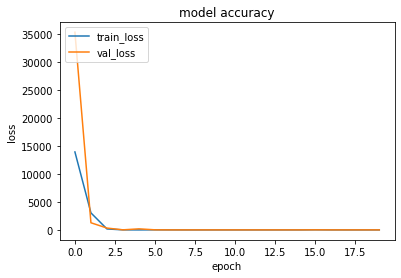

In [26]:
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

# Testing Model

In [27]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
3/3 [==============================] - 0s 3ms/step - loss: 5.8248
test loss 5.824831008911133
Generate predictions for 3 samples
predictions shape: (3, 1)


In [28]:
predictions

array([[0.3764807 ],
       [0.71609515],
       [0.6766735 ]], dtype=float32)

# Cross Validation

In [29]:
#build keras regressor model and train it for 25 epochs with batch size 32 
#and use kfold cross validation
estimator = KerasRegressor(build_fn=baseline_model, epochs=25, batch_size=32, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -0.55 (0.26) MSE
